In [6]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [7]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [8]:
fish_target = df.loc[cond, ['Species']]
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [11]:
# print(len(train_input))
# print(len(test_input))
# print(len(train_target))
# print(len(test_target))

In [12]:
# test_target # 잘 섞였는지 확인

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species']) # 학습

KNeighborsClassifier()

In [14]:
kn.score(test_input, test_target['Species']) # 채점

1.0

In [15]:
kn.predict([[25, 150]])

C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

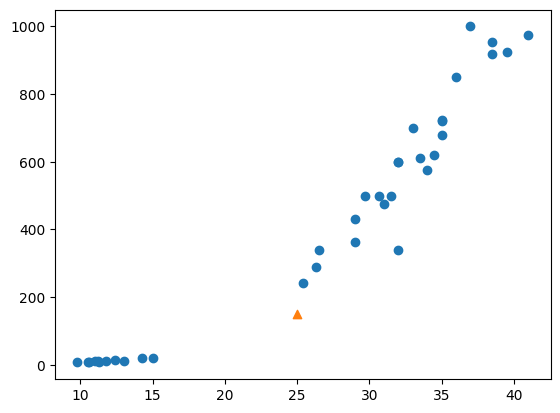

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^') # marker: 모양 바꾸기

In [17]:
kn.kneighbors([[25, 150]]) # 가까이에 있는 데이터와 거리를 계산해서 보여줌

C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.32150953]]),
 array([[ 7, 11, 28, 23,  4]]))

In [18]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     26.569444
Weight     432.211111
dtype: float64
Length2     10.480971
Weight     339.473519
dtype: float64


In [19]:
train_scaled = (train_input - mean) / std

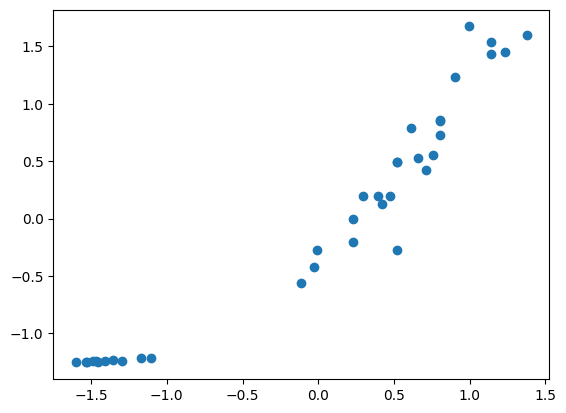

In [20]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [21]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [22]:
test_scaled = (test_input - mean) / std

In [23]:
kn.score(test_scaled, test_target['Species'])

1.0

In [24]:
new = ([25, 150] - mean) / std
new

Length2   -0.149742
Weight    -0.831320
dtype: float64

In [25]:
kn.predict([new])

C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## Penguins

- Adelie, Gentoo 구분하기

In [221]:
import seaborn as sns

df = sns.load_dataset('Penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [222]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
sample_data = df.loc[cond, ['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [163]:
# 결측치 제거 버전
sample_data = sample_data.dropna()

In [ ]:
# 결측치 채우기 버전
cond1 = sample_data['species'] == 'Adelie'
cond2 = sample_data['species'] == 'Gentoo'

al_mean = sample_data.loc[cond1, 'bill_length_mm'].mean()
ad_mean = sample_data.loc[cond1, 'bill_depth_mm'].mean()
af_mean = sample_data.loc[cond1, 'flipper_length_mm'].mean()
am_mean = sample_data.loc[cond1, 'body_mass_g'].mean()

gl_mean = sample_data.loc[cond2, 'bill_length_mm'].mean()
gd_mean = sample_data.loc[cond2, 'bill_depth_mm'].mean()
gf_mean = sample_data.loc[cond2, 'flipper_length_mm'].mean()
gm_mean = sample_data.loc[cond2, 'body_mass_g'].mean()

In [137]:
sample_data.loc[cond1, 'bill_length_mm'] = sample_data.loc[cond1, 'bill_length_mm'].fillna(al_mean)
sample_data.loc[cond1, 'bill_depth_mm'] = sample_data.loc[cond1, 'bill_depth_mm'].fillna(ad_mean)
sample_data.loc[cond1, 'flipper_length_mm'] = sample_data.loc[cond1, 'flipper_length_mm'].fillna(af_mean)
sample_data.loc[cond1, 'body_mass_g'] = sample_data.loc[cond1, 'body_mass_g'].fillna(am_mean)

sample_data.loc[cond2, 'bill_length_mm'] = sample_data.loc[cond2, 'bill_length_mm'].fillna(gl_mean)
sample_data.loc[cond2, 'bill_depth_mm'] = sample_data.loc[cond2, 'bill_depth_mm'].fillna(gd_mean)
sample_data.loc[cond2, 'flipper_length_mm'] = sample_data.loc[cond2, 'flipper_length_mm'].fillna(gf_mean)
sample_data.loc[cond2, 'body_mass_g'] = sample_data.loc[cond2, 'body_mass_g'].fillna(gm_mean)

In [224]:
# for문으로 결측치 채우기
for species in sample_data['species'].unique():
    cond = sample_data['species'] == species
    for column in sample_data.loc[cond].columns:
        if column != 'species':
            mean = sample_data.loc[cond, column].mean()
            sample_data.loc[cond, column] = sample_data.loc[cond, column].fillna(mean)

In [225]:
sample_data.isna().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [226]:
pen_target = sample_data.loc[cond, ['species']]

In [227]:
import matplotlib.pyplot as plt

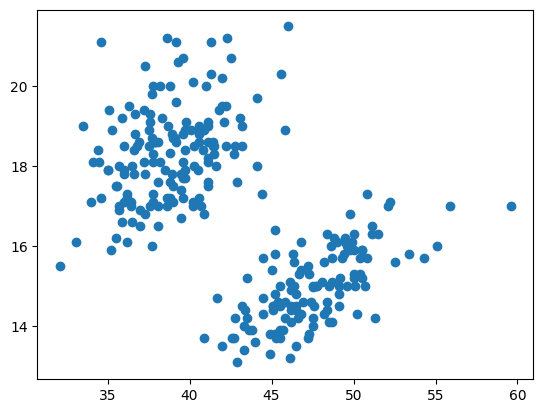

In [228]:
plt.scatter(sample_data['bill_length_mm'], sample_data['bill_depth_mm'])

In [229]:
pen_data = sample_data.loc[cond, ['bill_length_mm', 'bill_depth_mm']]

In [230]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(pen_data, pen_target)

In [231]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [232]:
kn.score(test_input, test_target['species'])

1.0